In [1]:
import numpy as np
import scipy.fftpack as fftpack
import matplotlib.pyplot as plt

In [2]:
fs = 128
axis = 0
s = np.linspace(0,10,fs*1)
x = np.sin(2*np.pi*1*s, dtype=np.float32) + np.sin(2*np.pi*6*s, dtype=np.float32) \
    + np.sin(2*np.pi*4*s, dtype=np.float32) + np.sin(2*np.pi*8*s, dtype=np.float32)  

Text(0.5, 1.0, 't domain')

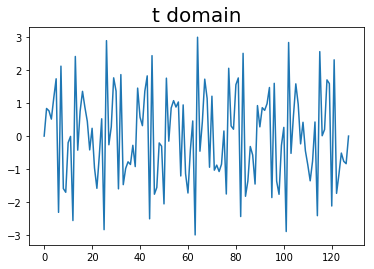

In [3]:
plt.plot(x)
plt.title('t domain', size = 20)

Text(0.5, 1.0, 'f domain')

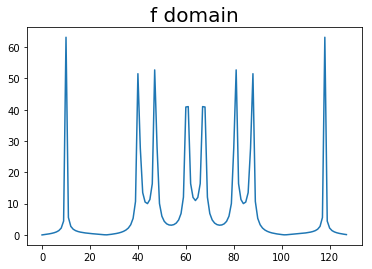

In [4]:
X = fftpack.fft(x)
plt.plot(abs(X))
plt.title('f domain', size = 20)

In [5]:
Nx = x.shape[0] # n_fft
num = Nx//2 # target samples
sl = [slice(None)] * x.ndim
newshape = list(x.shape)
N = int(np.minimum(num, Nx))

In [6]:
Y = np.zeros(newshape, 'D')

In [7]:
sl[0] = slice(0, (N + 1) // 2)
Y[tuple(sl)] = X[tuple(sl)]
sl[0] = slice(-(N - 1) // 2, None)
Y[tuple(sl)] = X[tuple(sl)]

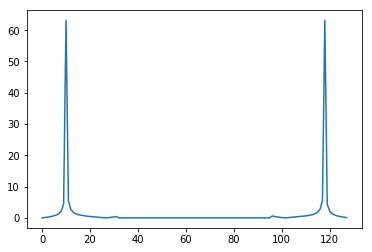

In [8]:
plt.plot(abs(Y))
Y_old = abs(Y)

In [9]:
if N % 2 == 0:  # special treatment if low number of points is even. So far we have set Y[-N/2]=X[-N/2]
    if N < Nx:  # if downsampling
        sl[axis] = slice(N//2,N//2+1,None)  # select the component at frequency N/2
        Y[tuple(sl)] += X[tuple(sl)]  # add the component of X at N/2
    elif N < num:  # if upsampling
        sl[axis] = slice(num-N//2,num-N//2+1,None)  # select the component at frequency -N/2
        Y[tuple(sl)] /= 2  # halve the component at -N/2
        temp = Y[tuple(sl)]
        sl[axis] = slice(N//2,N//2+1,None)  # select the component at +N/2
        Y[tuple(sl)] = temp  # set that equal to the component at -N/2

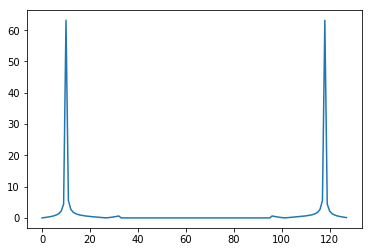

In [10]:
plt.plot(abs(Y))

In [11]:
y = fftpack.ifft(Y, axis=axis) #* (float(num) / float(Nx))

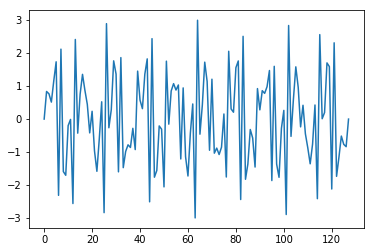

In [12]:
plt.plot(x)

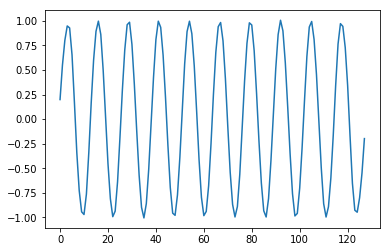

In [13]:
plt.plot(y.real)